In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [2]:
path = "C:\\Users\\alan\\SeaSim\\Assets\\Output\\ObjectPositions.txt"

In [157]:
with open(path) as f:
    data = f.read()

data = data.split('\n')[:-1]

tags = [row.split(" ")[0] for row in data]
x = np.array([float(row.split(" ")[1]) for row in data])
y = np.array([float(row.split(" ")[2]) for row in data])
z = np.array([float(row.split(" ")[3]) for row in data])
x_q = np.array([float(row.split(" ")[4]) for row in data])
y_q = np.array([float(row.split(" ")[5]) for row in data])
z_q = np.array([float(row.split(" ")[6]) for row in data])
w_q = np.array([float(row.split(" ")[7]) for row in data])

In [4]:
def tag_to_color(str):
    if str == "tetrapod_small": return "tab:blue"
    if str == "tetrapod_big": return "tab:cyan"
    if str == "cone": return "tab:red"
    if str == "ring": return "tab:orange"
    return "black"

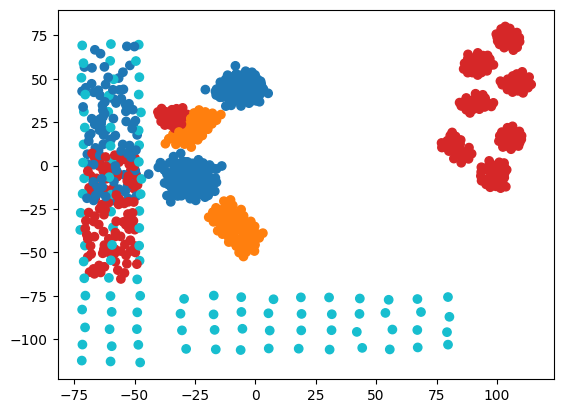

In [159]:
plt.scatter(x, z, c=[tag_to_color(tag) for tag in tags])
plt.show()

In [158]:
for i in range(len(x)):
    r = R.from_quat([-x_q[i], y_q[i], z_q[i], -w_q[i]])
    v = r.as_euler('zyx')
    v[1] += np.pi
    v[0] *= -1
    v = R.from_euler('zyx', v)
    v = R.from_euler('Z', np.pi) * R.from_euler('X', np.pi / 2) * v
    v = v.as_euler('zyx')
    print(tags[i],x[i],z[i],y[i],round(v[2],4), round(v[1],4), round(v[0],4))

ring -17.7992 25.3103 1.125 0.0 0.0 -0.6283
cone -57.9554 -40.7855 0.685 0.0 0.0 1.4311
tetrapod_small -30.0718 -10.639 2.3174 1.451 0.0809 -2.1936
tetrapod_small -2.0019 44.6584 2.7124 -2.6309 -0.3857 1.9931
tetrapod_small -1.1531 38.1024 0.7424 -2.3165 0.1267 -1.7131
tetrapod_small -48.9094 17.7215 0.4926 1.9533 -0.4678 -0.6059
tetrapod_small -1.4071 43.344 0.67 -2.242 0.3566 -2.796
ring -5.9918 -47.9919 1.5065 0.296 -0.0638 0.0444
cone 91.6246 59.4805 0.6842 0.0 -0.0 2.3812
tetrapod_small -67.7203 -14.0709 0.4926 -2.5739 -1.1645 -2.7966
ring -15.1123 -32.0814 1.125 0.0 0.0 -2.24
cone -28.7683 25.2275 0.6842 0.0 0.0 -1.3574
tetrapod_small -21.1227 -8.0089 1.1471 -1.5495 -0.154 -0.6377
tetrapod_small -1.1559 45.6539 0.7578 2.5011 -0.9389 -1.2295
tetrapod_small -25.2918 -15.5661 0.4926 2.1299 -0.8943 1.7656
cone 102.9561 67.9862 0.6842 0.0 -0.0 1.1919
ring -33.1784 17.5105 1.125 0.0 0.0 1.2915
cone -51.6387 -49.1529 0.6842 0.0 0.0 -2.3039
tetrapod_small -33.7275 -3.0809 0.5466 -2.1233 

In [12]:
a = np.array([10,1,-3])
flip = R.from_euler('zy', [90,90], degrees=True)
flip.apply(a)
np.set_printoptions(precision=4)

In [76]:
INPUT = "-4.5495 0.3973 -54.4801 -0.3407 -0.6073 0.0603 0.7152"
data = np.array([float(d) for d in INPUT.split(" ")])
r = R.from_quat([-data[3], data[4], data[5], -data[6]])
v = r.as_euler('zyx')
v[1] += np.pi
v[0] *= -1
[v[2], v[1], v[0]]

[-1.4978576641213532, 4.284242248463414, -0.9090527697764315]

In [156]:
# Same model
INPUT = "-47.9638 0.5933 -54.3852 0.7011 -0.0923 0.0923 0.7011"
data = np.array([float(d) for d in INPUT.split(" ")])
r = R.from_quat([-data[3], data[4], data[5], -data[6]])
v = r.as_euler('zyx')
v[1] += np.pi
v[0] *= -1
v = R.from_euler('zyx', v)
v = R.from_euler('Z', np.pi) * R.from_euler('X', np.pi / 2) * v
v = v.as_euler('zyx')
[v[2], v[1], v[0]]

[4.440892098500626e-16, 0.0, 0.2617949964772457]